In [1]:
import matplotlib.pyplot as plt
#from BP import * # you need to have graph tools for this implementation
from discretization import *
from solvers import *
from python_BP import *

%matplotlib inline

To build the discrete operator

\begin{equation}
A = b(x, y)\partial_x^2 + d(x, y)\partial_y^2 + a(x, y)\partial_x + c(x, y)\partial_y
\end{equation}

with zero Dirichlet boundary conditions (other BCs are not available)

\begin{equation}
u(0, x) = u(1, x) = u(x, 0) = u(x, 1) = 0.
\end{equation}

define four functions

In [2]:
a = lambda x, y: np.zeros_like(x)
b = lambda x, y: np.ones_like(x) + 0.01*np.cos(x*y)
c = lambda x, y: np.zeros_like(x)
d = lambda x, y: np.ones_like(x) - 0.01*np.sin(x*y)

for example, four functions above refers to the equation

\begin{equation}
A = \left(1 + 0.01 \cos(xy)\right)\partial_x^2 + \left(1 - 0.01\sin(xy)\right)\partial_y^2.
\end{equation}

Now define a grid and build the matrix.

In [3]:
N = 2**5 # number of points along each direction
h = 1/(N+1) # grid is uniform and h is a distance between neighrours along each axis
X = np.linspace(h, 1-h, N)
x, y = np.meshgrid(X, X)
Delta = delta(N, a, b, c, d)

Now we have a matrix. Define a right hand side.

In [4]:
rhs = (np.sin(np.pi*x)).reshape(-1,)

This particular right hand side is

\begin{equation}
    f(x) = \sin(\pi x)
\end{equation}

So we are trying to solve the equation

\begin{equation}
    \left[\left(1 + 0.01 \cos(xy)\right)\partial_x^2 + \left(1 - 0.01\sin(xy)\right)\partial_y^2\right] u(x, y) = \sin(\pi x)
\end{equation}

with boundary conditions

\begin{equation}
u(0, x) = u(1, x) = u(x, 0) = u(x, 1) = 0.
\end{equation}

The solution should not be far from $u(x, y) = -\sin(\pi x)/\pi^2$.

Now we can run available solvers.

BiCGSTAB (scipy)

In [5]:
solution, E_CG = BICGSTAB(Delta, rhs, tol=1e-15, verbose=True, write=True)

Iteration #1
      error = 4.6
Iteration #2
      error = 3.6
Iteration #3
      error = 2.1
Iteration #4
      error = 1.6
Iteration #5
      error = 1.1
Iteration #6
      error = 0.74
Iteration #7
      error = 0.59
Iteration #8
      error = 0.49
Iteration #9
      error = 0.46
Iteration #10
      error = 0.41
Iteration #11
      error = 0.36
Iteration #12
      error = 0.28
Iteration #13
      error = 0.2
Iteration #14
      error = 0.1
Iteration #15
      error = 0.051
Iteration #16
      error = 0.02
Iteration #17
      error = 0.0058
Iteration #18
      error = 0.0015
Iteration #19
      error = 0.00038
Iteration #20
      error = 0.00024
Iteration #21
      error = 0.00017
Iteration #22
      error = 0.00014
Iteration #23
      error = 9.4e-05
Iteration #24
      error = 8.3e-05
Iteration #25
      error = 7.9e-05
Iteration #26
      error = 7.3e-05
Iteration #27
      error = 6.7e-05
Iteration #28
      error = 6e-05
Iteration #29
      error = 5.3e-05
Iteration #30
      err

Gauss-Seidel

In [6]:
solution, E_GS = GS(Delta, rhs, tol=h**2, verbose=True, write=True)

Iteration #1
      error = 0.99
Iteration #2
      error = 0.99
Iteration #3
      error = 0.99
Iteration #4
      error = 0.98
Iteration #5
      error = 0.98
Iteration #6
      error = 0.97
Iteration #7
      error = 0.97
Iteration #8
      error = 0.96
Iteration #9
      error = 0.96
Iteration #10
      error = 0.95
Iteration #11
      error = 0.95
Iteration #12
      error = 0.95
Iteration #13
      error = 0.94
Iteration #14
      error = 0.94
Iteration #15
      error = 0.93
Iteration #16
      error = 0.93
Iteration #17
      error = 0.92
Iteration #18
      error = 0.92
Iteration #19
      error = 0.92
Iteration #20
      error = 0.91
Iteration #21
      error = 0.91
Iteration #22
      error = 0.9
Iteration #23
      error = 0.9
Iteration #24
      error = 0.89
Iteration #25
      error = 0.89
Iteration #26
      error = 0.89
Iteration #27
      error = 0.88
Iteration #28
      error = 0.88
Iteration #29
      error = 0.87
Iteration #30
      error = 0.87
Iteration #31
      e

Iteration #263
      error = 0.12
Iteration #264
      error = 0.12
Iteration #265
      error = 0.12
Iteration #266
      error = 0.11
Iteration #267
      error = 0.11
Iteration #268
      error = 0.11
Iteration #269
      error = 0.11
Iteration #270
      error = 0.11
Iteration #271
      error = 0.11
Iteration #272
      error = 0.11
Iteration #273
      error = 0.11
Iteration #274
      error = 0.11
Iteration #275
      error = 0.11
Iteration #276
      error = 0.1
Iteration #277
      error = 0.1
Iteration #278
      error = 0.1
Iteration #279
      error = 0.1
Iteration #280
      error = 0.1
Iteration #281
      error = 0.1
Iteration #282
      error = 0.099
Iteration #283
      error = 0.098
Iteration #284
      error = 0.097
Iteration #285
      error = 0.097
Iteration #286
      error = 0.096
Iteration #287
      error = 0.095
Iteration #288
      error = 0.094
Iteration #289
      error = 0.093
Iteration #290
      error = 0.092
Iteration #291
      error = 0.091
Iteration 

Iteration #515
      error = 0.012
Iteration #516
      error = 0.012
Iteration #517
      error = 0.012
Iteration #518
      error = 0.012
Iteration #519
      error = 0.012
Iteration #520
      error = 0.011
Iteration #521
      error = 0.011
Iteration #522
      error = 0.011
Iteration #523
      error = 0.011
Iteration #524
      error = 0.011
Iteration #525
      error = 0.011
Iteration #526
      error = 0.011
Iteration #527
      error = 0.011
Iteration #528
      error = 0.011
Iteration #529
      error = 0.011
Iteration #530
      error = 0.01
Iteration #531
      error = 0.01
Iteration #532
      error = 0.01
Iteration #533
      error = 0.01
Iteration #534
      error = 0.01
Iteration #535
      error = 0.01
Iteration #536
      error = 0.0099
Iteration #537
      error = 0.0098
Iteration #538
      error = 0.0097
Iteration #539
      error = 0.0096
Iteration #540
      error = 0.0095
Iteration #541
      error = 0.0095
Iteration #542
      error = 0.0094
Iteration #543
    

Iteration #744
      error = 0.0015
Iteration #745
      error = 0.0015
Iteration #746
      error = 0.0015
Iteration #747
      error = 0.0015
Iteration #748
      error = 0.0014
Iteration #749
      error = 0.0014
Iteration #750
      error = 0.0014
Iteration #751
      error = 0.0014
Iteration #752
      error = 0.0014
Iteration #753
      error = 0.0014
Iteration #754
      error = 0.0014
Iteration #755
      error = 0.0014
Iteration #756
      error = 0.0013
Iteration #757
      error = 0.0013
Iteration #758
      error = 0.0013
Iteration #759
      error = 0.0013
Iteration #760
      error = 0.0013
Iteration #761
      error = 0.0013
Iteration #762
      error = 0.0013
Iteration #763
      error = 0.0013
Iteration #764
      error = 0.0012
Iteration #765
      error = 0.0012
Iteration #766
      error = 0.0012
Iteration #767
      error = 0.0012
Iteration #768
      error = 0.0012
Iteration #769
      error = 0.0012
Iteration #770
      error = 0.0012
Iteration #771
      error =

Belief propagation split solver (see the article for details)

In [7]:
solution, E_split = split_BP_solver(Delta, rhs, tol=h**2, verbose=True, write=True)

Iteration #1
      error = 6.3
Iteration #2
      error = 4.7
Iteration #3
      error = 3.0
Iteration #4
      error = 1.9
Iteration #5
      error = 1.2
Iteration #6
      error = 0.75
Iteration #7
      error = 0.47
Iteration #8
      error = 0.29
Iteration #9
      error = 0.18
Iteration #10
      error = 0.11
Iteration #11
      error = 0.071
Iteration #12
      error = 0.045
Iteration #13
      error = 0.028
Iteration #14
      error = 0.017
Iteration #15
      error = 0.011
Iteration #16
      error = 0.0068
Iteration #17
      error = 0.0042
Iteration #18
      error = 0.0027
Iteration #19
      error = 0.0017
Iteration #20
      error = 0.001
Iteration #21
      error = 0.00065


In [8]:
solution_1, E_BP = BP_solver(Delta, rhs, tol=h**2, verbose=True, write=True)

Iteration #1
      error = 0.99
Iteration #2
      error = 0.99
Iteration #3
      error = 0.98
Iteration #4
      error = 0.98
Iteration #5
      error = 0.98
Iteration #6
      error = 0.97
Iteration #7
      error = 0.97
Iteration #8
      error = 0.96
Iteration #9
      error = 0.96
Iteration #10
      error = 0.95
Iteration #11
      error = 0.95
Iteration #12
      error = 0.94
Iteration #13
      error = 0.94
Iteration #14
      error = 0.94
Iteration #15
      error = 0.93
Iteration #16
      error = 0.93
Iteration #17
      error = 0.92
Iteration #18
      error = 0.92
Iteration #19
      error = 0.91
Iteration #20
      error = 0.91
Iteration #21
      error = 0.91
Iteration #22
      error = 0.9
Iteration #23
      error = 0.9
Iteration #24
      error = 0.89
Iteration #25
      error = 0.89
Iteration #26
      error = 0.88
Iteration #27
      error = 0.88
Iteration #28
      error = 0.88
Iteration #29
      error = 0.87
Iteration #30
      error = 0.87
Iteration #31
      e

Iteration #246
      error = 0.13
Iteration #247
      error = 0.13
Iteration #248
      error = 0.13
Iteration #249
      error = 0.13
Iteration #250
      error = 0.13
Iteration #251
      error = 0.13
Iteration #252
      error = 0.13
Iteration #253
      error = 0.13
Iteration #254
      error = 0.12
Iteration #255
      error = 0.12
Iteration #256
      error = 0.12
Iteration #257
      error = 0.12
Iteration #258
      error = 0.12
Iteration #259
      error = 0.12
Iteration #260
      error = 0.12
Iteration #261
      error = 0.12
Iteration #262
      error = 0.12
Iteration #263
      error = 0.11
Iteration #264
      error = 0.11
Iteration #265
      error = 0.11
Iteration #266
      error = 0.11
Iteration #267
      error = 0.11
Iteration #268
      error = 0.11
Iteration #269
      error = 0.11
Iteration #270
      error = 0.11
Iteration #271
      error = 0.11
Iteration #272
      error = 0.11
Iteration #273
      error = 0.1
Iteration #274
      error = 0.1
Iteration #275
 

Iteration #482
      error = 0.016
Iteration #483
      error = 0.015
Iteration #484
      error = 0.015
Iteration #485
      error = 0.015
Iteration #486
      error = 0.015
Iteration #487
      error = 0.015
Iteration #488
      error = 0.015
Iteration #489
      error = 0.015
Iteration #490
      error = 0.014
Iteration #491
      error = 0.014
Iteration #492
      error = 0.014
Iteration #493
      error = 0.014
Iteration #494
      error = 0.014
Iteration #495
      error = 0.014
Iteration #496
      error = 0.014
Iteration #497
      error = 0.014
Iteration #498
      error = 0.013
Iteration #499
      error = 0.013
Iteration #500
      error = 0.013
Iteration #501
      error = 0.013
Iteration #502
      error = 0.013
Iteration #503
      error = 0.013
Iteration #504
      error = 0.013
Iteration #505
      error = 0.013
Iteration #506
      error = 0.012
Iteration #507
      error = 0.012
Iteration #508
      error = 0.012
Iteration #509
      error = 0.012
Iteration #510
     

Iteration #712
      error = 0.0019
Iteration #713
      error = 0.0019
Iteration #714
      error = 0.0019
Iteration #715
      error = 0.0019
Iteration #716
      error = 0.0018
Iteration #717
      error = 0.0018
Iteration #718
      error = 0.0018
Iteration #719
      error = 0.0018
Iteration #720
      error = 0.0018
Iteration #721
      error = 0.0018
Iteration #722
      error = 0.0017
Iteration #723
      error = 0.0017
Iteration #724
      error = 0.0017
Iteration #725
      error = 0.0017
Iteration #726
      error = 0.0017
Iteration #727
      error = 0.0017
Iteration #728
      error = 0.0016
Iteration #729
      error = 0.0016
Iteration #730
      error = 0.0016
Iteration #731
      error = 0.0016
Iteration #732
      error = 0.0016
Iteration #733
      error = 0.0016
Iteration #734
      error = 0.0016
Iteration #735
      error = 0.0015
Iteration #736
      error = 0.0015
Iteration #737
      error = 0.0015
Iteration #738
      error = 0.0015
Iteration #739
      error =

In [9]:
np.linalg.norm(solution - solution_1, ord=np.inf)

4.22394833087536e-05

For other available solvers see the notebook that reproduces figures from the article.

Now it is possible to access convergence history. For example for the split solver.

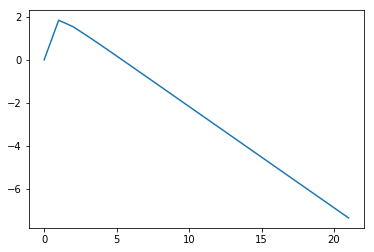

In [10]:
plt.plot(np.log(E_split))

Or for the Gaussian belief propagation solver

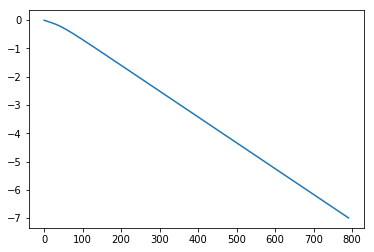

In [11]:
plt.plot(np.log(E_BP))